# Sobre o Projeto
## Análise de Eficiência de Turbinas Eólica
### Neste projeto vamos tentar entender se o rendimento real das turbinas é equivalente ao rendimento teórico declarado pelo fabricante e analisar anormalidades definindo um limite de variação aceitável.

### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

### Dataset 

In [2]:
windturbines = pd.read_csv('T1.csv')
windturbines

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


### Gráfico Scaterrplot
####  Active Power (kW) x Wind Speed

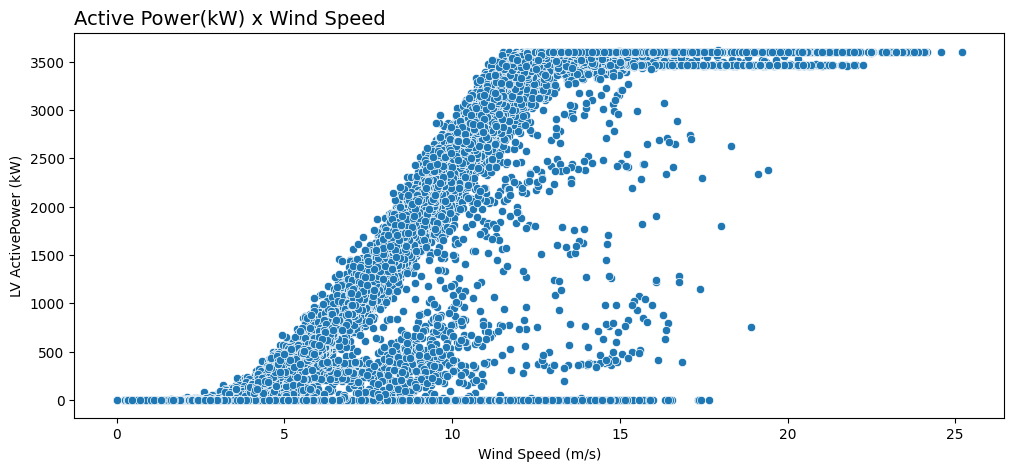

In [7]:
plt.figure(figsize=(12, 5))
plt.title('Active Power(kW) x Wind Speed', loc='left', fontsize=14)
sns.scatterplot(data=windturbines, x='Wind Speed (m/s)', y='LV ActivePower (kW)');

####  Theorical Power (kW) x Wind Speed

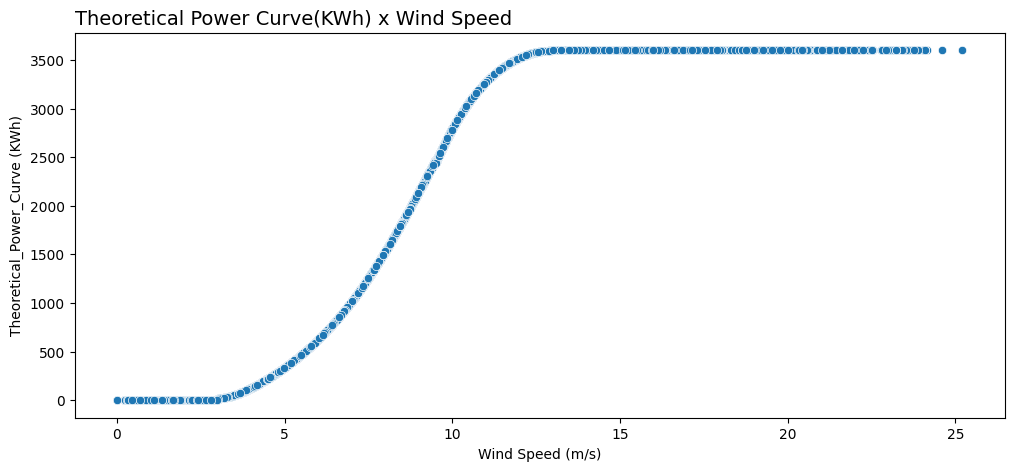

In [6]:
plt.figure(figsize=(12, 5))
plt.title('Theoretical Power Curve(KWh) x Wind Speed', loc='left', fontsize=14)
sns.scatterplot(data=windturbines, x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)');

### Definindo um Limite Aceitável de Variação
#### Para simplificar o projeto defini um limite aceitável de 5% de variação máxima e mínima entre o valor ativo e o valor teórico
#### Em um projeto real focado na área de Energia Eólica, técnicas mais refinadas podem ser utilizadas em conjunto com Machine Learning

In [11]:
active_pot = windturbines['LV ActivePower (kW)'].tolist()
theorical_pot = windturbines['Theoretical_Power_Curve (KWh)'].tolist()
max_pot = []
min_pot = []
limit = []

for potency in theorical_pot:
    max_pot.append(potency*1.05)
    min_pot.append(potency*0.95)

for i, potency in enumerate(active_pot):
    if potency >= min_pot[i] and potency <= max_pot[i]:
        limit.append('Inside Limit')
    elif potency == 0:
        limit.append('Zero')
    else:
        limit.append('Out of Limit')

In [12]:
# Checando se funcionou
len(max_pot), len(min_pot), len(theorical_pot)

(50530, 50530, 50530)

In [22]:
# Checando a porcentagem dos valores
il = limit.count('Inside Limit')/len(limit) * 100
z = limit.count('Zero')/len(limit) * 100
ol = limit.count('Out of Limit')/len(limit) * 100
f'{il:.2f}%', f'{z:.2f}%', f'{ol:.2f}%'

('37.29%', '6.92%', '55.79%')

In [23]:
# Adicionando a coluna Limite ao Dataset
windturbines['Limit'] = limit
windturbines

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Limit
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Out of Limit
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Out of Limit
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Out of Limit
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Out of Limit
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Out of Limit
...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,Out of Limit
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,Out of Limit
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,Out of Limit
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,Inside Limit


### Gráfico Scatterplot com os novos limites
#### Com esse gráfico nós podemos analisar anormalidades usando o limite definido anteriormente

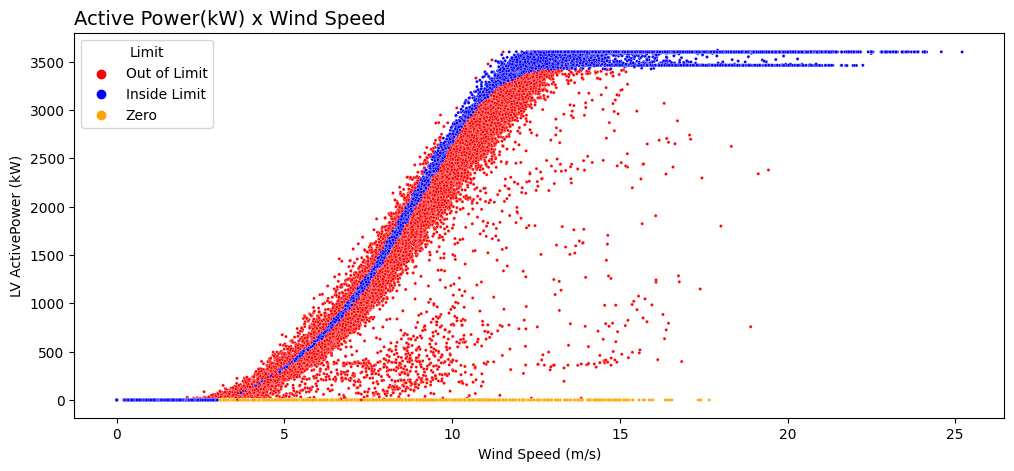

In [26]:
colors = {'Inside Limit':'blue', 'Out of Limit':'red', 'Zero':'orange'}
plt.figure(figsize=(12, 5))
plt.title('Active Power(kW) x Wind Speed', loc='left', fontsize=14)
sns.scatterplot(data=windturbines, x='Wind Speed (m/s)', y='LV ActivePower (kW)', hue='Limit', s=5,
               palette = colors
               );